<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/tensorflow5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

#Normalization
train_images= train_images.reshape(60000,28,28,1)
train_images= train_images/255.0
test_images= test_images.reshape(10000,28,28,1)
test_images= test_images/255.0

In [0]:
# Creating a CNN model
model= keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.4408
Epoch 2/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.2969
Epoch 3/5
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.2515
Epoch 4/5
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.2171
Epoch 5/5
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.1934


In [12]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 4s 405us/sample - loss: 0.2519


0.2518681804716587

# **Virtualization of the CNN model**

In [13]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [0]:
import matplotlib.pyplot as plt

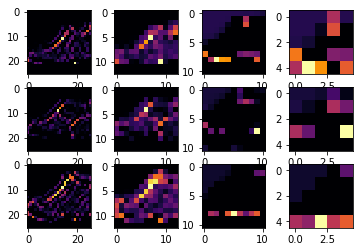

In [16]:
f,axarr= plt.subplots(3,4)
first= 0
second=23
third=28
cn=1
layer_outputs= [layer.output for layer in model.layers]
activation_model= keras.models.Model(inputs= model.input, outputs= layer_outputs)
for x in range(0,4):
  f1= activation_model.predict(test_images[first].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0, : , : ,cn], cmap='inferno')
  axarr[0,x].grid(False)
  f2= activation_model.predict(test_images[second].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, : , : ,cn], cmap='inferno')
  axarr[1,x].grid(False)
  f3= activation_model.predict(test_images[third].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , : ,cn], cmap='inferno')
  axarr[2,x].grid(False)